# DATA MINING PROJECT 1

# DATA PREPARATION

In [3]:
import pandas as pd 
import dask.dataframe as dd
import os
from tqdm import tqdm

FILE_PATH = r'..\Downloads\Data Mining P1\nyc_taxi_fare.csv'

In [4]:
%%time
with open(FILE_PATH) as file:
    n_rows = len(file.readlines())

print (f'Exact number of rows: {n_rows}')

Exact number of rows: 55423857
CPU times: total: 14.1 s
Wall time: 21.9 s


In [5]:
df = pd.read_csv(FILE_PATH, nrows=12000000)
display(df.head())

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000000 entries, 0 to 11999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 732.4+ MB


In [7]:
print(df.columns)

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [8]:
display(df.head())
display(df.tail())

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11999995,2010-07-11 19:12:00.00000071,11.3,2010-07-11 19:12:00 UTC,-73.954797,40.769870,-73.947038,40.764707,5
11999996,2012-06-01 07:44:00.000000190,6.9,2012-06-01 07:44:00 UTC,-73.994112,40.751075,-73.975917,40.758022,6
11999997,2012-06-08 15:00:48.0000004,33.7,2012-06-08 15:00:48 UTC,-73.980722,40.753208,-73.861160,40.767828,1
11999998,2014-10-11 23:12:00.00000094,18.0,2014-10-11 23:12:00 UTC,-73.996397,40.721057,-73.984342,40.764805,3
11999999,2012-06-27 13:36:51.0000001,8.5,2012-06-27 13:36:51 UTC,-73.976908,40.765980,-73.989320,40.756577,3


# Sorting Date


In [10]:
df = df.sort_values(by='pickup_datetime', ascending=True)
print("Number of rows in DataFrame:", len(df))
print("First 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

Number of rows in DataFrame: 12000000
First 5 rows:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
880228,2009-01-01 00:00:46.0000002,15.0,2009-01-01 00:00:46 UTC,-73.953738,40.806762,-73.989427,40.769542,1
661006,2009-01-01 00:01:04.0000001,5.8,2009-01-01 00:01:04 UTC,-73.995133,40.734111,-73.998232,40.722874,2
8959140,2009-01-01 00:02:24.0000001,10.6,2009-01-01 00:02:24 UTC,-73.980739,40.765118,-73.975443,40.752247,2
3094958,2009-01-01 00:03:04.0000001,10.6,2009-01-01 00:03:04 UTC,-74.007669,40.742966,-73.980098,40.748366,4
7392924,2009-01-01 00:04:47.0000001,31.0,2009-01-01 00:04:47 UTC,-73.981557,40.741131,-73.872380,40.896354,1



Last 5 rows:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11792101,2015-06-30 23:58:23.0000005,13.5,2015-06-30 23:58:23 UTC,-73.984215,40.725189,-73.971283,40.695660,1
11070616,2015-06-30 23:58:58.0000004,16.5,2015-06-30 23:58:58 UTC,-73.984970,40.760277,-73.981880,40.721386,1
2203030,2015-06-30 23:59:03.0000004,11.0,2015-06-30 23:59:03 UTC,-73.969475,40.750282,-73.993965,40.751568,1
5015769,2015-06-30 23:59:45.0000001,50.5,2015-06-30 23:59:45 UTC,-73.776718,40.645172,-73.984352,40.691208,1
9271269,2015-06-30 23:59:54.0000003,8.0,2015-06-30 23:59:54 UTC,-73.968117,40.751141,-73.980461,40.732216,1


In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.200000e+07,1.200000e+07,1.200000e+07,1.199992e+07,1.199992e+07,1.200000e+07
mean,1.133842e+01,-7.251050e+01,3.991974e+01,-7.251034e+01,3.992025e+01,1.684948e+00
std,9.797611e+00,1.291242e+01,9.262699e+00,1.277134e+01,9.347702e+00,1.325028e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076712e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.400392e+03,2.080000e+02


# min fare_amount
- Negative fares are not valid in the context of NYC Taxi fares, it will be removing.
# Out-of-Range Longitude/Latitude
- Some longitude/latitude values may not correspond to valid locations in New York City.

# Location

# NYC Coordinates 
- source: https://en.wikipedia.org/wiki/New_York_(state)

In [15]:
nyc_bounds = {
    'min_longitude': -79.767,  # Approx -79° 46′ W
    'max_longitude': -71.850,  # Approx -71° 51′ W
    'min_latitude': 40.500,    # Approx 40° 30′ N
    'max_latitude': 45.017     # Approx 45° 1′ N
}

df = df[
    (df['pickup_longitude'] >= nyc_bounds['min_longitude']) & 
    (df['pickup_longitude'] <= nyc_bounds['max_longitude']) & 
    (df['pickup_latitude'] >= nyc_bounds['min_latitude']) & 
    (df['pickup_latitude'] <= nyc_bounds['max_latitude']) &
    (df['dropoff_longitude'] >= nyc_bounds['min_longitude']) & 
    (df['dropoff_longitude'] <= nyc_bounds['max_longitude']) &
    (df['dropoff_latitude'] >= nyc_bounds['min_latitude']) & 
    (df['dropoff_latitude'] <= nyc_bounds['max_latitude'])
]

In [16]:
# minimum and maximum longitude 
min(df.pickup_longitude.min(), df.dropoff_longitude.min()), \
max(df.pickup_longitude.max(), df.dropoff_longitude.max())

(-79.693889, -71.876492)

In [17]:
# minimum and maximum latitude
min(df.pickup_latitude.min(), df.dropoff_latitude.min()), \
max(df.pickup_latitude.max(), df.dropoff_latitude.max())

(40.500033, 44.894651)

# Drop rows with negative fare amounts & Drop 'Key'

In [19]:
df = df[df['fare_amount'] >= 0]
df = df.drop(columns=['key'])

# Dealing with Data

In [21]:
print(df.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [22]:
df = df.dropna(how = 'any', axis = 'rows')
print('Size: %d' % len(df))

Size: 11746393


In [23]:
print(df.describe())

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1.174639e+07      1.174639e+07     1.174639e+07       1.174639e+07   
mean   1.132010e+01     -7.397524e+01     4.075111e+01      -7.397437e+01   
std    9.684045e+00      4.111945e-02     3.024605e-02       3.978784e-02   
min    0.000000e+00     -7.965000e+01     4.050004e+01      -7.969389e+01   
25%    6.000000e+00     -7.399228e+01     4.073656e+01      -7.399159e+01   
50%    8.500000e+00     -7.398210e+01     4.075336e+01      -7.398060e+01   
75%    1.250000e+01     -7.396832e+01     4.076755e+01      -7.396536e+01   
max    9.520000e+02     -7.187649e+01     4.489465e+01      -7.188869e+01   

       dropoff_latitude  passenger_count  
count      1.174639e+07     1.174639e+07  
mean       4.075148e+01     1.684825e+00  
std        3.352005e-02     1.312617e+00  
min        4.050003e+01     0.000000e+00  
25%        4.073559e+01     1.000000e+00  
50%        4.075387e+01     1.000000e+00  
75%  

In [24]:
df = df.reset_index(drop=True)
display(df.head())
display(df.tail())
n_rows, n_cols = df.shape
print(f'Exact number of rows: {n_rows}')
print(f'Exact number of columns: {n_cols}')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15.0,2009-01-01 00:00:46 UTC,-73.953738,40.806762,-73.989427,40.769542,1
1,5.8,2009-01-01 00:01:04 UTC,-73.995133,40.734111,-73.998232,40.722874,2
2,10.6,2009-01-01 00:02:24 UTC,-73.980739,40.765118,-73.975443,40.752247,2
3,10.6,2009-01-01 00:03:04 UTC,-74.007669,40.742966,-73.980098,40.748366,4
4,31.0,2009-01-01 00:04:47 UTC,-73.981557,40.741131,-73.872380,40.896354,1


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11746388,13.5,2015-06-30 23:58:23 UTC,-73.984215,40.725189,-73.971283,40.695660,1
11746389,16.5,2015-06-30 23:58:58 UTC,-73.984970,40.760277,-73.981880,40.721386,1
11746390,11.0,2015-06-30 23:59:03 UTC,-73.969475,40.750282,-73.993965,40.751568,1
11746391,50.5,2015-06-30 23:59:45 UTC,-73.776718,40.645172,-73.984352,40.691208,1
11746392,8.0,2015-06-30 23:59:54 UTC,-73.968117,40.751141,-73.980461,40.732216,1


Exact number of rows: 11746393
Exact number of columns: 7


# Data Visualization

In [26]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [27]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['year'] = df['pickup_datetime'].dt.year 
df['month'] = df['pickup_datetime'].dt.month 
df['day'] = df['pickup_datetime'].dt.day 
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek 
df['hour'] = df['pickup_datetime'].dt.hour

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,15.0,2009-01-01 00:00:46+00:00,-73.953738,40.806762,-73.989427,40.769542,1,2009,1,1,3,0
1,5.8,2009-01-01 00:01:04+00:00,-73.995133,40.734111,-73.998232,40.722874,2,2009,1,1,3,0
2,10.6,2009-01-01 00:02:24+00:00,-73.980739,40.765118,-73.975443,40.752247,2,2009,1,1,3,0
3,10.6,2009-01-01 00:03:04+00:00,-74.007669,40.742966,-73.980098,40.748366,4,2009,1,1,3,0
4,31.0,2009-01-01 00:04:47+00:00,-73.981557,40.741131,-73.872380,40.896354,1,2009,1,1,3,0


In [29]:
dayofweek_mapping = {
    0:'Monday', 
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}

df['day'] = df['day'].replace(dayofweek_mapping)


In [30]:
dayofweek_mapping = {
    0:'Monday', 
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
}

df['day_of_week'] = df['day_of_week'].replace(dayofweek_mapping)

In [31]:
month_mapping = { 
    1:'Jan',
    2:'Feb',
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun', 
    7:'Jul', 
    8:'Aug',
    9:'Sep', 
    10:'Oct', 
    11:'Nov', 
    12:'Dec'
}

df['month'] = df['month'].replace(month_mapping)

In [32]:
df = df.dropna(how = 'any', axis = 'rows')
print('Size: %d' % len(df))

Size: 11746393


1. fare_amount: Cost of the taxi ride.
2. pickup_datetime: Start date and time of the ride.
3. pickup_longitude: Longitude of the pickup location.
4. pickup_latitude: Latitude of the pickup location.
5. dropoff_longitude: Longitude of the drop-off location.
6. dropoff_latitude: Latitude of the drop-off location.
7.passenger_count: Number of passengers in the ride.
8. year: Year of the ride.
9. month: Month of the ride (1-12).
10. day: Day of the month.
11. day_of_week: Day of the week (e.g., Monday).
12. hour: Hour of the day (0-23).

### Q1 How do average taxi fares vary across different hours and days of the week.

Hypothesis
Null Hypothesis (H0): There is no significant difference in average taxi fares across different hours of the day and days of the week.

Alternative Hypothesis (H1): There is a significant difference in average taxi fares across different hours of the day and days of the week.

In [36]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\1532391968.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare = df.groupby(['day_of_week', 'hour'])['fare_amount'].mean().unstack()


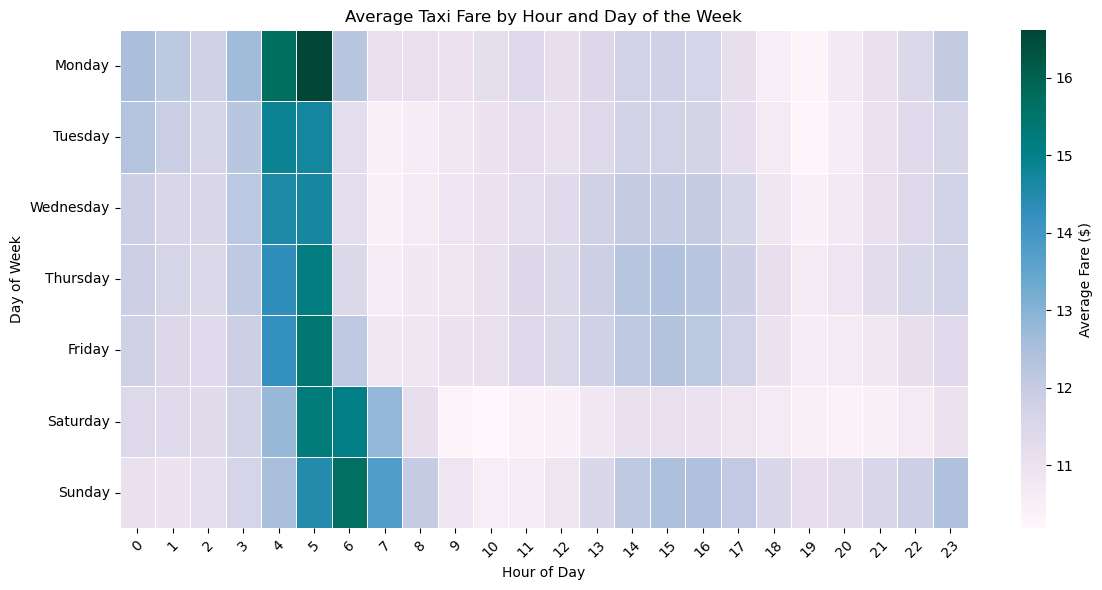

In [37]:
avg_fare = df.groupby(['day_of_week', 'hour'])['fare_amount'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(avg_fare, cmap='PuBuGn', annot=False, linewidths=0.5, cbar_kws={'label': 'Average Fare ($)'})
plt.title('Average Taxi Fare by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45) 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\2324410924.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare = df.groupby(['day_of_week', 'hour'])['fare_amount'].mean().unstack()


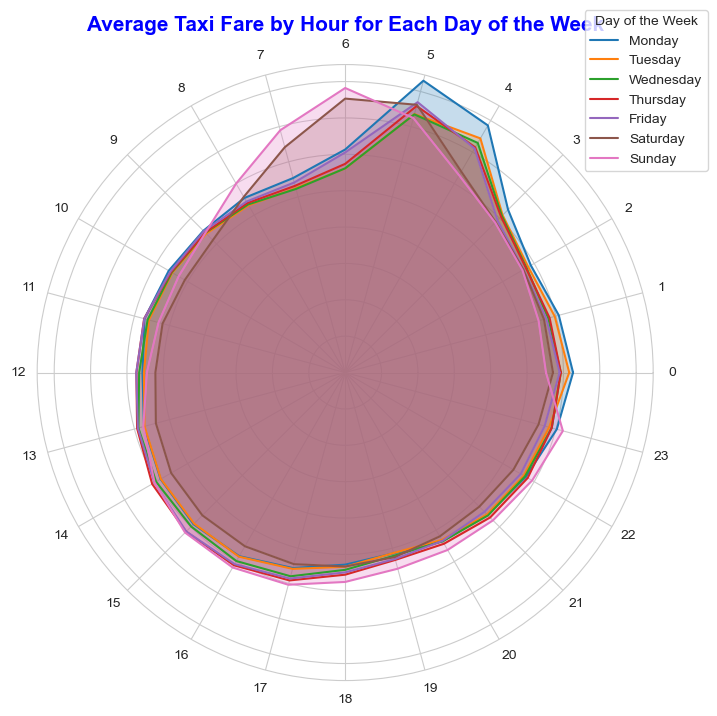

In [289]:
avg_fare = df.groupby(['day_of_week', 'hour'])['fare_amount'].mean().unstack()

categories = avg_fare.index.tolist()
num_categories = len(categories)

num_vars = avg_fare.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

for i in range(num_categories):
    values = avg_fare.iloc[i].tolist()
    values += values[:1]
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=categories[i])

plt.xticks(angles[:-1], avg_fare.columns.astype(str))
ax.set_yticklabels([]) 
plt.title('Average Taxi Fare by Hour for Each Day of the Week', size=15, color='blue', weight='bold')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.1, 1.1))
plt.show()

C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\3716484684.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare = df.groupby(['day_of_week', 'hour'])['fare_amount'].mean().unstack()


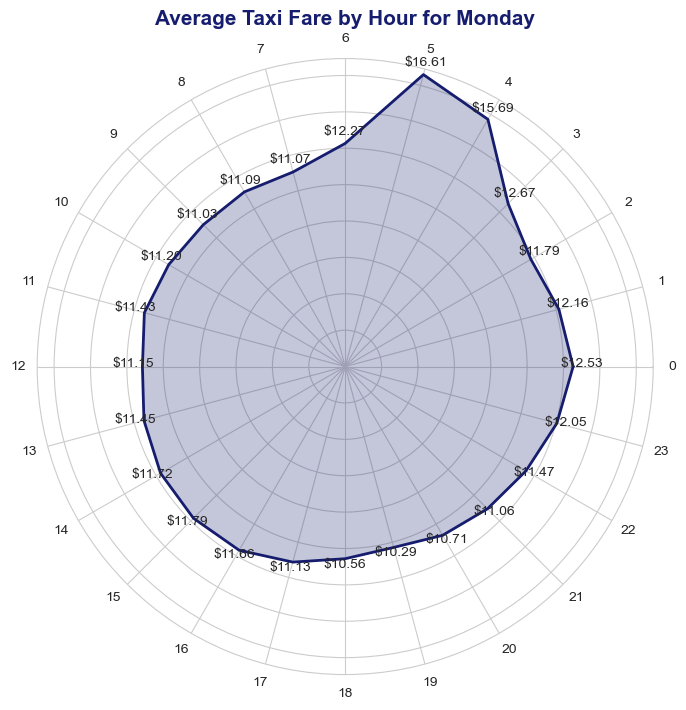

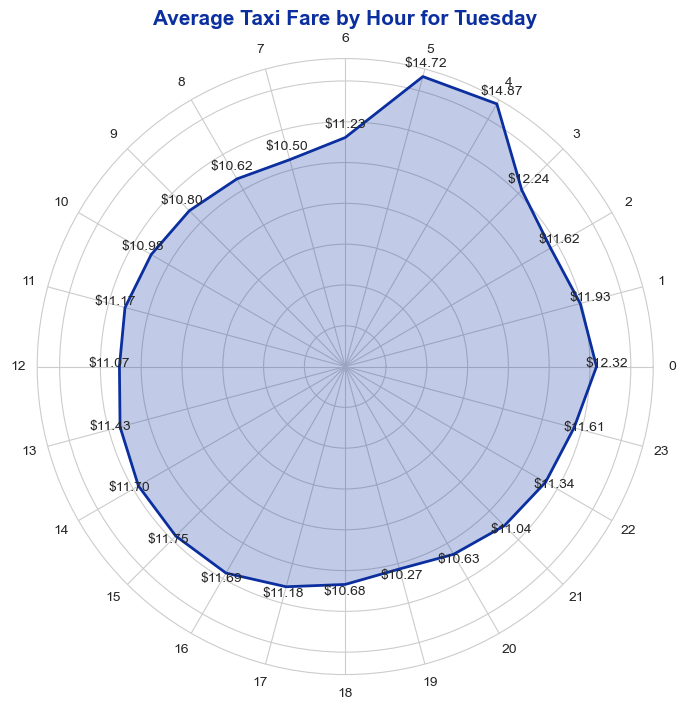

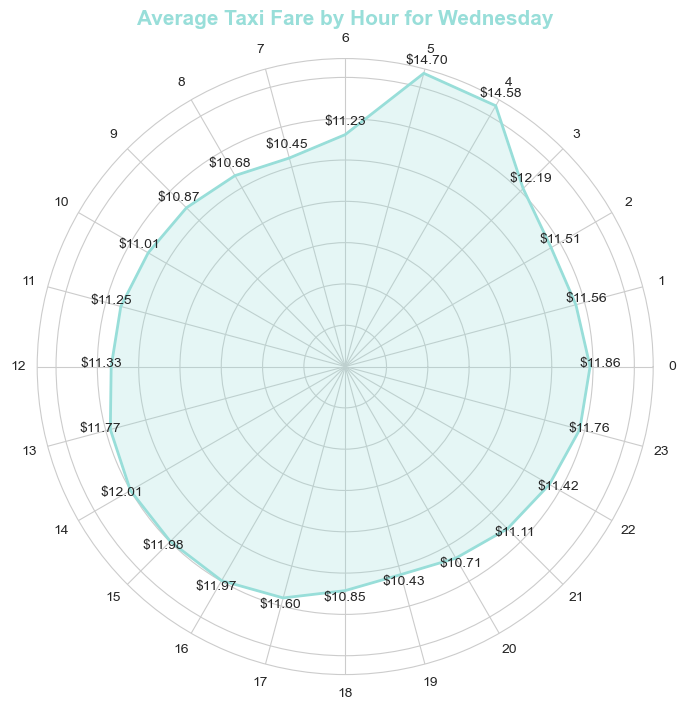

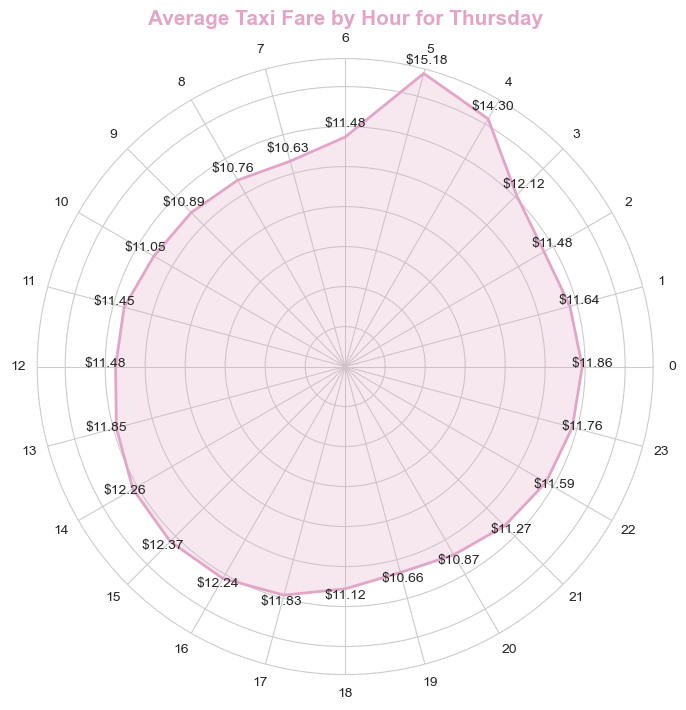

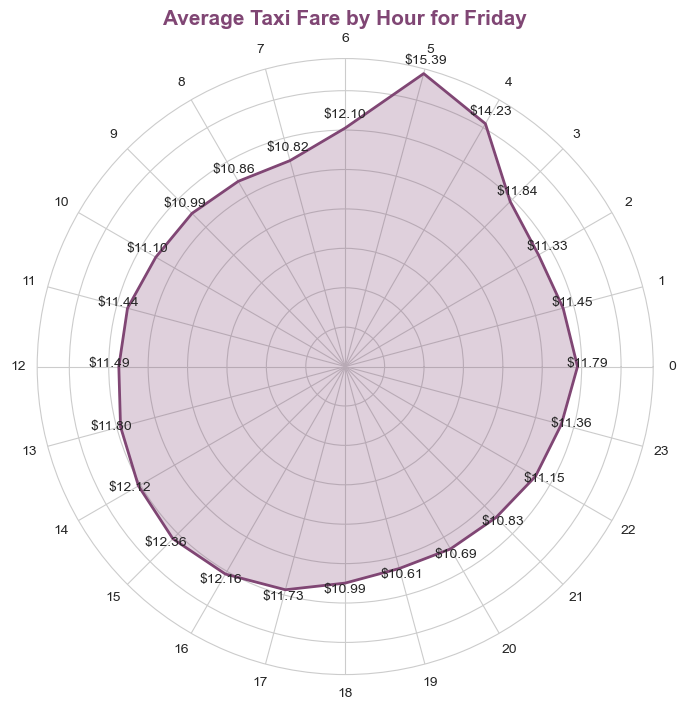

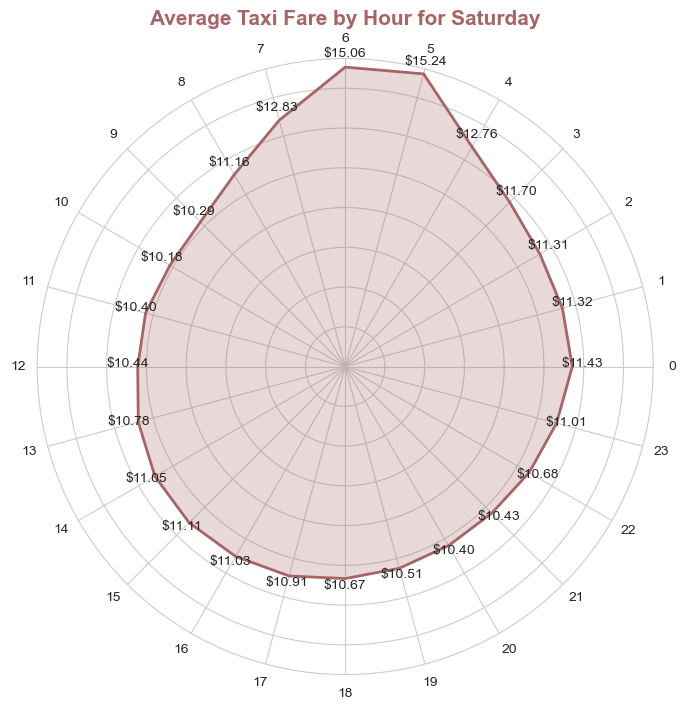

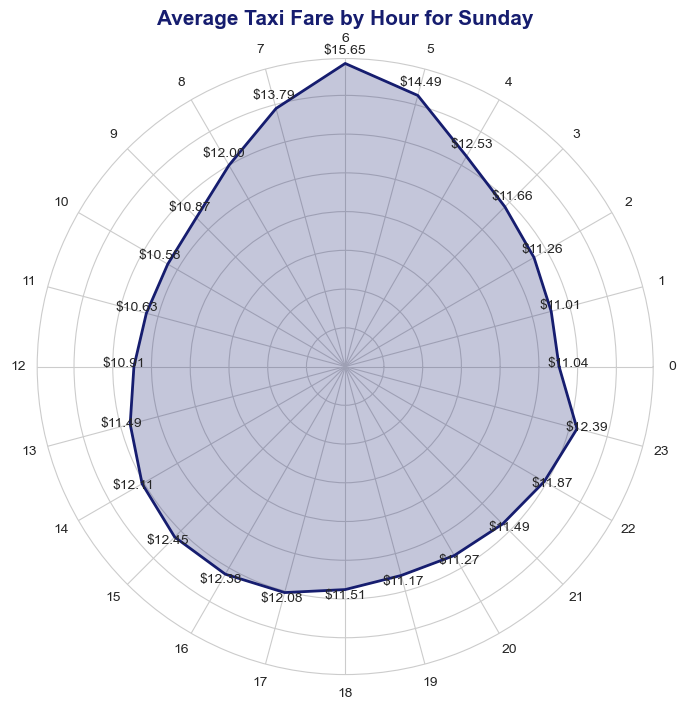

In [299]:
avg_fare = df.groupby(['day_of_week', 'hour'])['fare_amount'].mean().unstack()


num_vars = avg_fare.shape[1]


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

colors = ['#161D6F', '#0B2F9F', '#98DED9', '#E3A5C7', '#804674', '#A86464']


for idx, day in enumerate(avg_fare.index):
    values = avg_fare.loc[day].tolist()
    values += values[:1] 

    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    ax.fill(angles, values, alpha=0.25, color=colors[idx % len(colors)])
    ax.plot(angles, values, color=colors[idx % len(colors)], linewidth=2)

    
    for i in range(num_vars):
        ax.text(angles[i], values[i] + 0.5, f'${values[i]:.2f}', horizontalalignment='center', size=10)

  
    plt.xticks(angles[:-1], avg_fare.columns.astype(str))
    ax.set_yticklabels([]) 
    plt.title(f'Average Taxi Fare by Hour for {day.capitalize()}', size=15, color=colors[idx % len(colors)], weight='bold')
    plt.show()


### Hypothesis Testing Q1

In [318]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [320]:
data = df.groupby(['day_of_week', 'hour'])['fare_amount'].apply(list).reset_index()

C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\3976277042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(['day_of_week', 'hour'])['fare_amount'].apply(list).reset_index()


In [321]:
fare_data = []
days = data['day_of_week'].unique()
hours = data['hour'].unique()

for day in days:
    for hour in hours:
        fare_amounts = data[(data['day_of_week'] == day) & (data['hour'] == hour)]['fare_amount'].values
        fare_data.append(fare_amounts[0] if len(fare_amounts) > 0 else [])

f_val, p_val = stats.f_oneway(*fare_data)

print(f'F-value: {f_val}, p-value: {p_val}')

F-value: 438.26570442489066, p-value: 0.0


In [322]:
model = ols('fare_amount ~ C(day_of_week) + C(hour) + C(day_of_week):C(hour)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                              sum_sq          df            F  PR(>F)
C(day_of_week)          4.453338e+05         6.0   796.365200     0.0
C(hour)                 4.598058e+06        23.0  2144.985994     0.0
C(day_of_week):C(hour)  1.786459e+06       138.0   138.896658     0.0
Residual                1.094764e+09  11746225.0          NaN     NaN


### Q1: Conclusion,
Reject the null hypothesis (H0) and since all p-values are 0.0 (which is less than 0.05), there are significant differences in average taxi fares across different hours and days of the week.

### Q2 How do average travel distances vary by hour of the day across different days of the week?

Hypotheses
1. Null Hypothesis (H0): There is no significant difference in average travel distances across different hours of the day and days of the week.
2. Alternative Hypothesis (H1): There is a significant difference in average travel distances across different hours of the day and days of the week.

In [222]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [226]:
from geopy.distance import great_circle

In [235]:
pickup_counts = df.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='count')
top_pickups = pickup_counts.sort_values(by='count', ascending=False).head(10)
print(top_pickups)

          pickup_latitude  pickup_longitude  count
11476747        41.366138        -73.137393   4024
11303714        40.803238        -73.940717    361
8925176         40.769413        -73.863300    284
7335863         40.761200        -73.995808    251
6707095         40.758242        -73.937475    230
4893667         40.749467        -73.946078    206
11458213        40.837168        -73.850417    201
2538241         40.733697        -73.951818    183
6682397         40.758122        -73.937452    176
6680952         40.758115        -73.937350    175


In [237]:
dropoff_counts = df.groupby(['dropoff_latitude', 'dropoff_longitude']).size().reset_index(name='count')
top_dropoffs = dropoff_counts.sort_values(by='count', ascending=False).head(10)
print(top_dropoffs)


          dropoff_latitude  dropoff_longitude  count
11580084         41.366138         -73.137393   3130
11213931         40.803238         -73.940717    360
8826021          40.769413         -73.863300    290
7336116          40.761200         -73.995808    251
6690972          40.758242         -73.937475    230
4873165          40.749467         -73.946078    206
11481484         40.837168         -73.850417    202
2692032          40.733697         -73.951818    183
6663388          40.758115         -73.937350    175
6664869          40.758122         -73.937452    175


In [ ]:
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(pickup, dropoff).kilometers
df['distance_km'] = df.apply(calculate_distance, axis=1)
print(df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance_km']])

In [260]:
average_distance_by_day = df.groupby('day_of_week')['distance_km'].mean().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_distance_by_day['day_of_week'] = pd.Categorical(average_distance_by_day['day_of_week'], categories=day_order, ordered=True)
average_distance_by_day = average_distance_by_day.sort_values('day_of_week')


C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\101802479.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_distance_by_day = df.groupby('day_of_week')['distance_km'].mean().reset_index()


In [264]:
average_distance2 = df.groupby(['day_of_week', 'hour', 'passenger_count'])['distance_km'].mean().reset_index()

C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\2462559966.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_distance2 = df.groupby(['day_of_week', 'hour', 'passenger_count'])['distance_km'].mean().reset_index()


C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\155240390.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = average_distance2.pivot_table(index='hour', columns='day_of_week', values='distance_km')


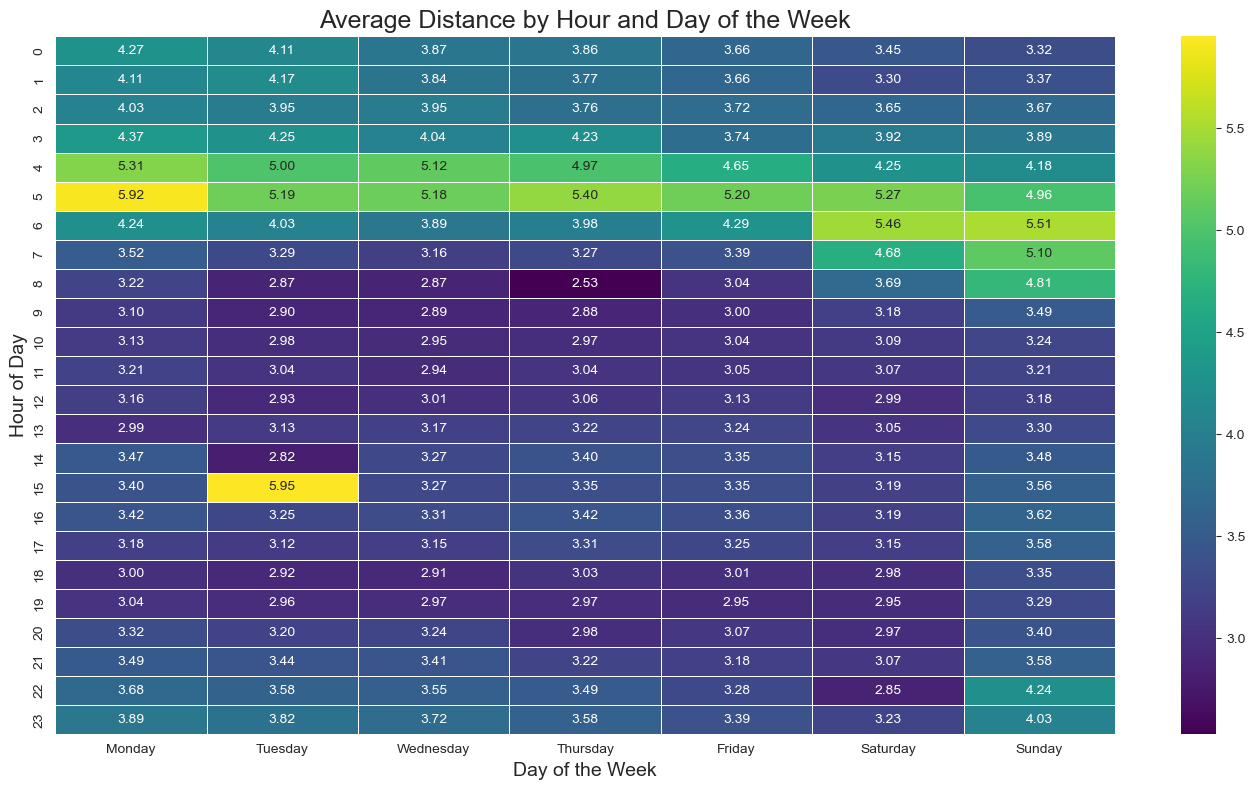

In [270]:
heatmap_data = average_distance2.pivot_table(index='hour', columns='day_of_week', values='distance_km')
plt.figure(figsize=(14, 8)) 
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Average Distance by Hour and Day of the Week', fontsize=18) 
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Hour of Day', fontsize=14)
plt.tight_layout()
plt.show()


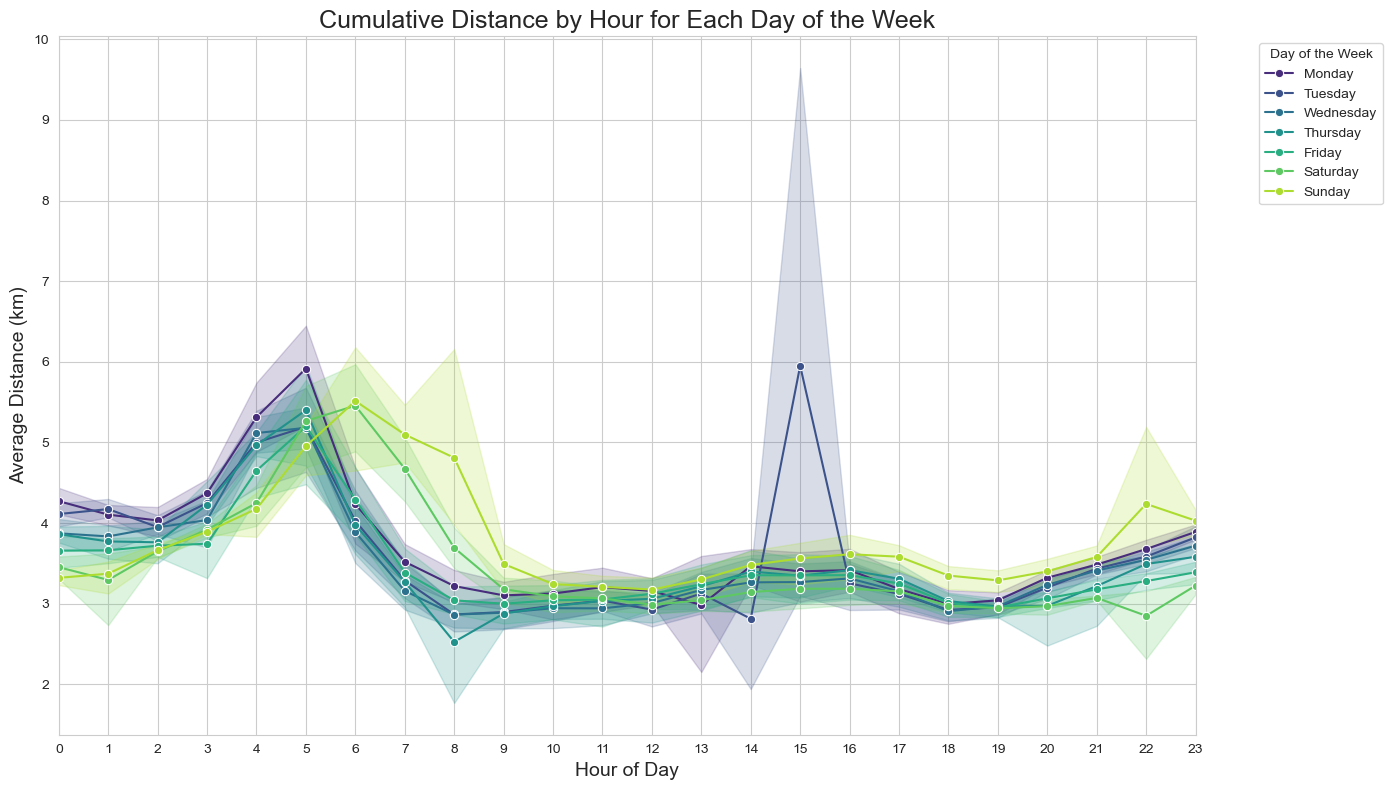

In [280]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_distance2, x='hour', y='distance_km', hue='day_of_week', palette='viridis', marker='o')

plt.title('Cumulative Distance by Hour for Each Day of the Week', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Distance (km)', fontsize=14)

plt.xlim(6, 20) 

plt.xticks(range(0, 24))
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Hypothesis Testing Q2

In [348]:
model = ols('distance_km ~ C(day_of_week) + C(hour) + C(day_of_week):C(hour)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)
p_values = anova_table['PR(>F)']
print("P-values:\n", p_values)

                              sum_sq          df            F  PR(>F)
C(day_of_week)          1.175065e+05         6.0  1240.196951     0.0
C(hour)                 1.594453e+06        23.0  4389.990878     0.0
C(day_of_week):C(hour)  3.884903e+05       138.0   178.271103     0.0
Residual                1.854891e+08  11746225.0          NaN     NaN
P-values:
 C(day_of_week)            0.0
C(hour)                   0.0
C(day_of_week):C(hour)    0.0
Residual                  NaN
Name: PR(>F), dtype: float64


### Q2: Conclusion
Reject the null hypothesis (H0), average travel distances are significantly affected by both the hour of the day and the day of the week.

### Q3 What are the trends in total fare amounts by year and month?

### Hypothesis
1. Null Hypothesis (H0):
There is no significant difference in the total fare amounts across different months and years.
2. Alternative Hypothesis (H1):
There is a significant difference in the total fare amounts across different months and years.

In [206]:
total_fare_monthly = df.groupby(['year', 'month'])['fare_amount'].sum().reset_index()

print(total_fare_yearly)
print(total_fare_monthly)


   year  fare_amount
0  2009  18364395.62
1  2010  17954754.99
2  2011  19467541.36
3  2012  20974215.02
4  2013  23056778.73
5  2014  22530827.28
6  2015  10621772.70
    year month  fare_amount
0   2009   Apr   1514754.71
1   2009   Aug   1494980.44
2   2009   Dec   1581819.13
3   2009   Feb   1395306.37
4   2009   Jan   1448488.07
..   ...   ...          ...
73  2015   Feb   1656652.83
74  2015   Jan   1640707.36
75  2015   Jun   1764676.64
76  2015   Mar   1829179.07
77  2015   May   1908155.59

[78 rows x 3 columns]


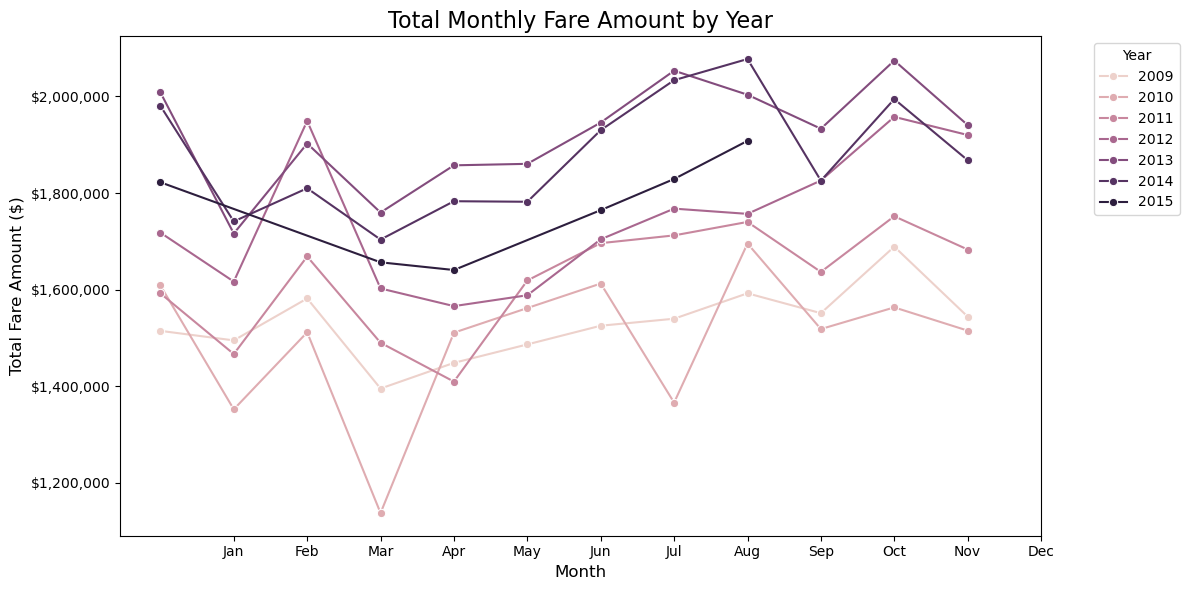

In [49]:
from matplotlib.ticker import FuncFormatter

def currency_formatter(x, pos):
    return f'${int(x):,}'
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_fare_monthly, x='month', y='fare_amount', hue='year', marker='o')
plt.title('Total Monthly Fare Amount by Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Fare Amount ($)', fontsize=12)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\3011795603.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=total_fare_monthly, x='month', y='fare_amount', palette='viridis')


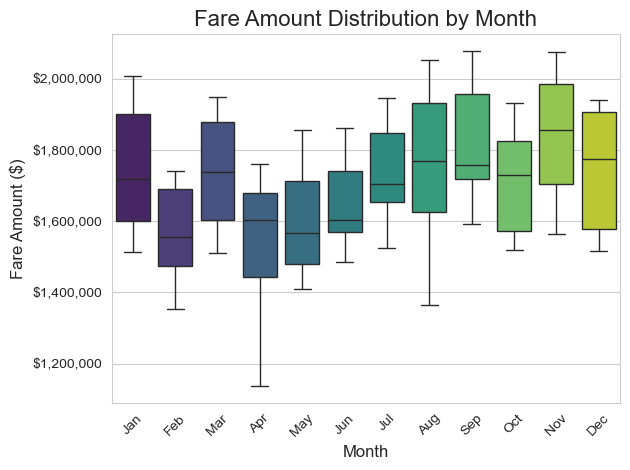

In [210]:
from matplotlib.ticker import FuncFormatter

def currency_formatter(x, pos):
    return f'${int(x):,}'

sns.boxplot(data=total_fare_monthly, x='month', y='fare_amount', palette='viridis')
plt.title('Fare Amount Distribution by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()


C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\2076871375.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=total_fare_monthly, x='year', y='fare_amount', palette='viridis')


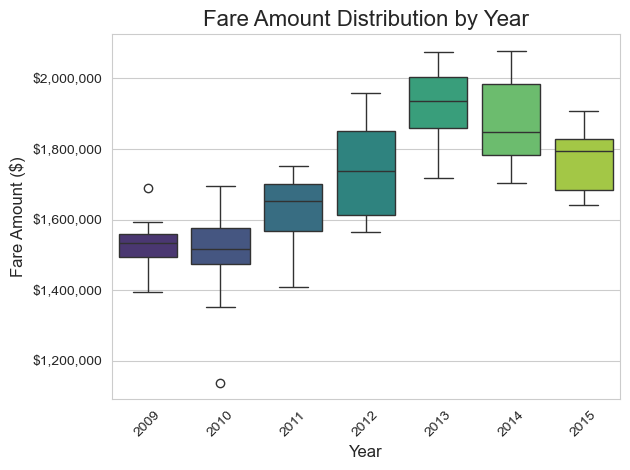

In [220]:
sns.boxplot(data=total_fare_monthly, x='year', y='fare_amount', palette='viridis')


plt.title('Fare Amount Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)


plt.xticks(ticks=range(len(total_fare_monthly['year'].unique())), 
           labels=total_fare_monthly['year'].unique(), rotation=45)


plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()


### Hypothesis Testing Q3

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     89.94
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.59e-14
Time:                        22:35:57   Log-Likelihood:                -1030.2
No. Observations:                  78   AIC:                             2064.
Df Residuals:                      76   BIC:                             2069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.46e+06   2.99e+04     48.786      0.0

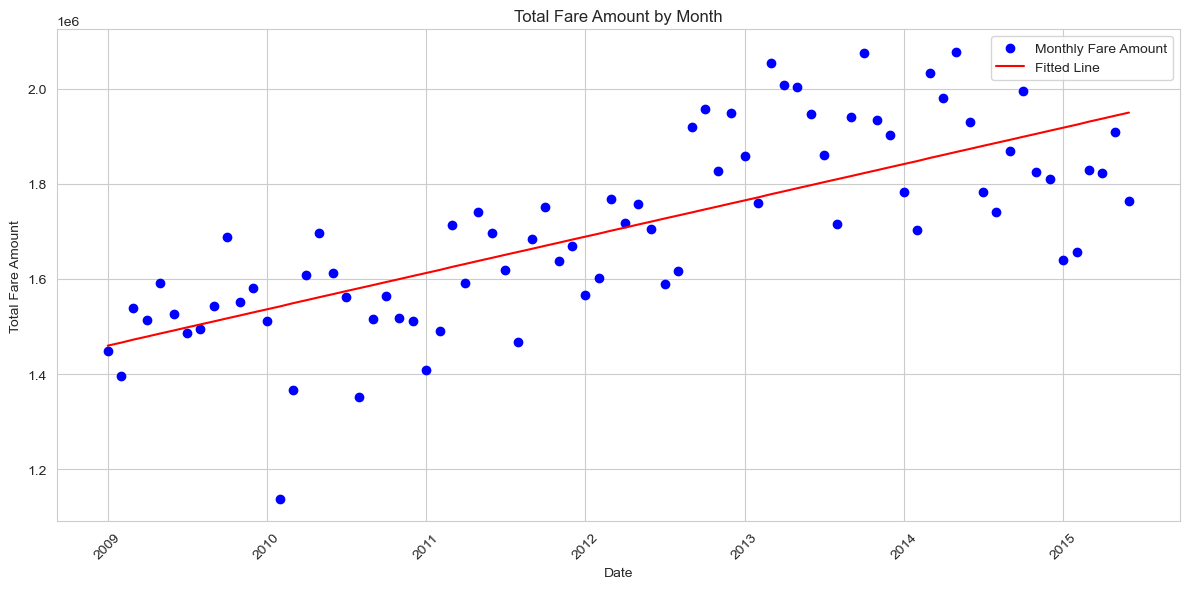

In [359]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['month_no'] = df['month'].map(month_map)

df['month_no'] = pd.to_numeric(df['month_no'], errors='coerce')

monthly_fare = df.groupby(['year', 'month_no'])['fare_amount'].sum().reset_index()

monthly_fare['date'] = pd.to_datetime(monthly_fare[['year']].astype(str).assign(month=monthly_fare['month_no'], day=1))

monthly_fare['time'] = range(len(monthly_fare))

X = sm.add_constant(monthly_fare['time'])
y = monthly_fare['fare_amount']

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(12, 6))
plt.scatter(monthly_fare['date'], y, label='Monthly Fare Amount', color='blue')
plt.plot(monthly_fare['date'], model.predict(X), label='Fitted Line', color='red')
plt.title('Total Fare Amount by Month')
plt.xlabel('Date')
plt.ylabel('Total Fare Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q4  Which day has the highest passenger count by each month?

In [132]:
correlation_data_yearly = df.groupby('year').agg({
    'passenger_count': 'mean',
    'fare_amount': 'mean'
}).reset_index()

In [134]:
correlation = correlation_data_yearly[['passenger_count', 'fare_amount']].corr().iloc[0, 1]
print(f'Correlation between passenger count and fare amount: {correlation}')


Correlation between passenger count and fare amount: 0.5496424872556767


In [136]:
passenger_count_by_month_day = df.groupby(['month', 'day_of_week'])['passenger_count'].sum().reset_index()
heatmap_data = passenger_count_by_month_day.pivot(index='day_of_week', columns='month', values='passenger_count')

C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\2878607190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_count_by_month_day = df.groupby(['month', 'day_of_week'])['passenger_count'].sum().reset_index()


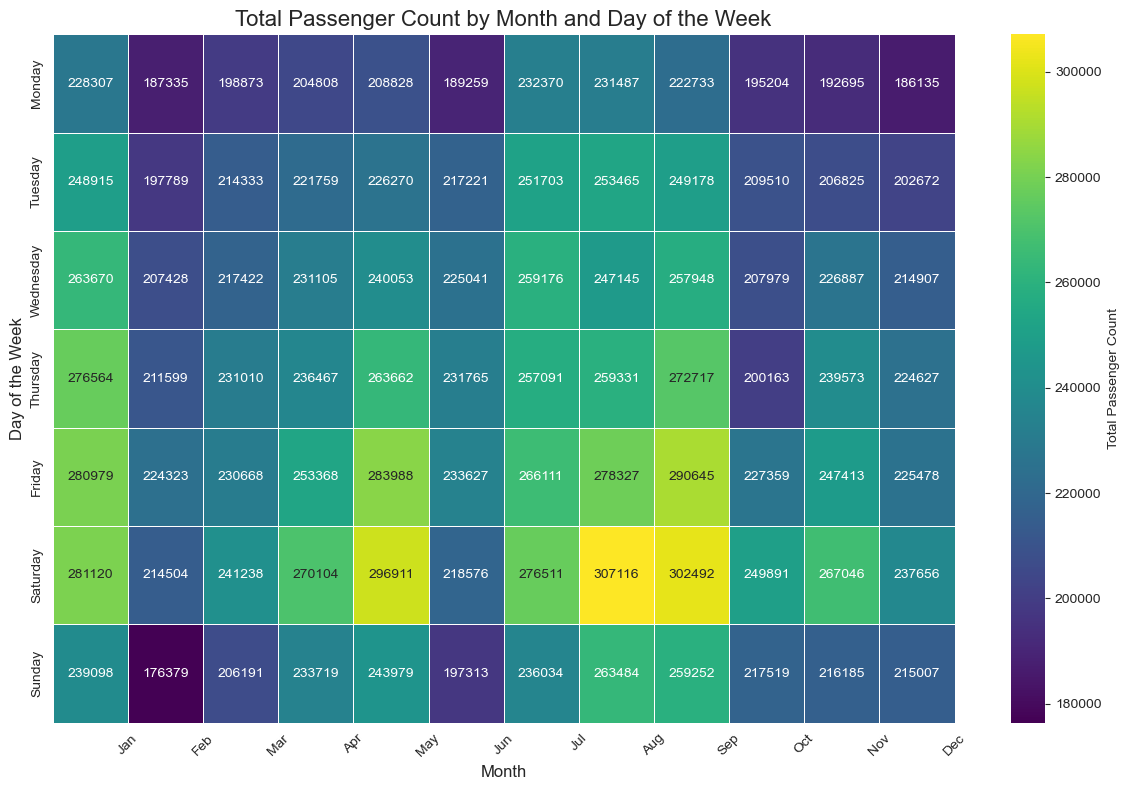

In [137]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Total Passenger Count'})
plt.title('Total Passenger Count by Month and Day of the Week', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\3793678064.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=passenger_count_by_month_day, x='month', y='passenger_count', hue='day_of_week',


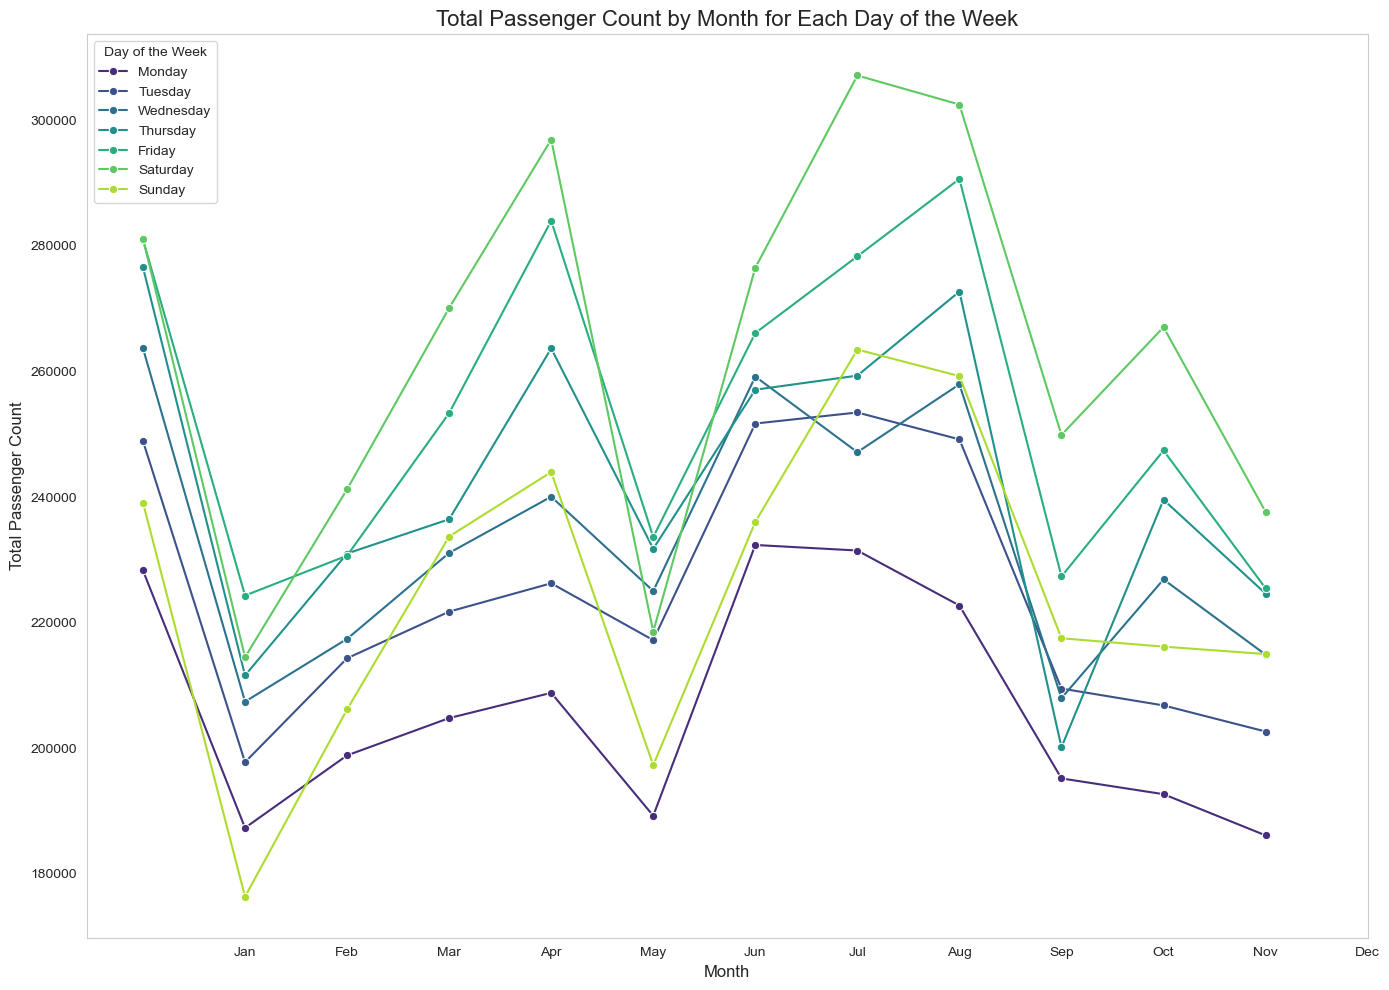

In [140]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(14, 10))
sns.lineplot(data=passenger_count_by_month_day, x='month', y='passenger_count', hue='day_of_week', 
             palette='viridis', marker='o', estimator='sum', ci=None)

plt.title('Total Passenger Count by Month for Each Day of the Week', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Day of the Week', loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

In [361]:
for month in df['month'].unique():
    monthly_data = df[df['month'] == month]
    
    day_groups = [monthly_data[monthly_data['day_of_week'] == day]['passenger_count'] for day in monthly_data['day_of_week'].unique()]

    kruskal_stat, p_value = stats.kruskal(*day_groups)
    
    print(f"\nMonth: {month}")
    print(f"Kruskal-Wallis Test Statistic: {kruskal_stat}")
    print(f"P-Value: {p_value}")
    
    if p_value < 0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")


Month: Jan
Kruskal-Wallis Test Statistic: 4566.835751646106
P-Value: 0.0
Reject null hypothesis

Month: Feb
Kruskal-Wallis Test Statistic: 4683.801862353786
P-Value: 0.0
Reject null hypothesis

Month: Mar
Kruskal-Wallis Test Statistic: 4991.37940984222
P-Value: 0.0
Reject null hypothesis

Month: Apr
Kruskal-Wallis Test Statistic: 4637.342947350067
P-Value: 0.0
Reject null hypothesis

Month: May
Kruskal-Wallis Test Statistic: 4657.518343703068
P-Value: 0.0
Reject null hypothesis

Month: Jun
Kruskal-Wallis Test Statistic: 3947.385972324763
P-Value: 0.0
Reject null hypothesis

Month: Jul
Kruskal-Wallis Test Statistic: 3523.773731240303
P-Value: 0.0
Reject null hypothesis

Month: Aug
Kruskal-Wallis Test Statistic: 2904.039114988639
P-Value: 0.0
Reject null hypothesis

Month: Sep
Kruskal-Wallis Test Statistic: 3548.721888028212
P-Value: 0.0
Reject null hypothesis

Month: Oct
Kruskal-Wallis Test Statistic: 4112.333247234018
P-Value: 0.0
Reject null hypothesis

Month: Nov
Kruskal-Wallis Test

### Q5 How have passenger counts evolved from year to year?

In [156]:
annual_passenger_counts = df.groupby('year')['passenger_count'].sum().reset_index()

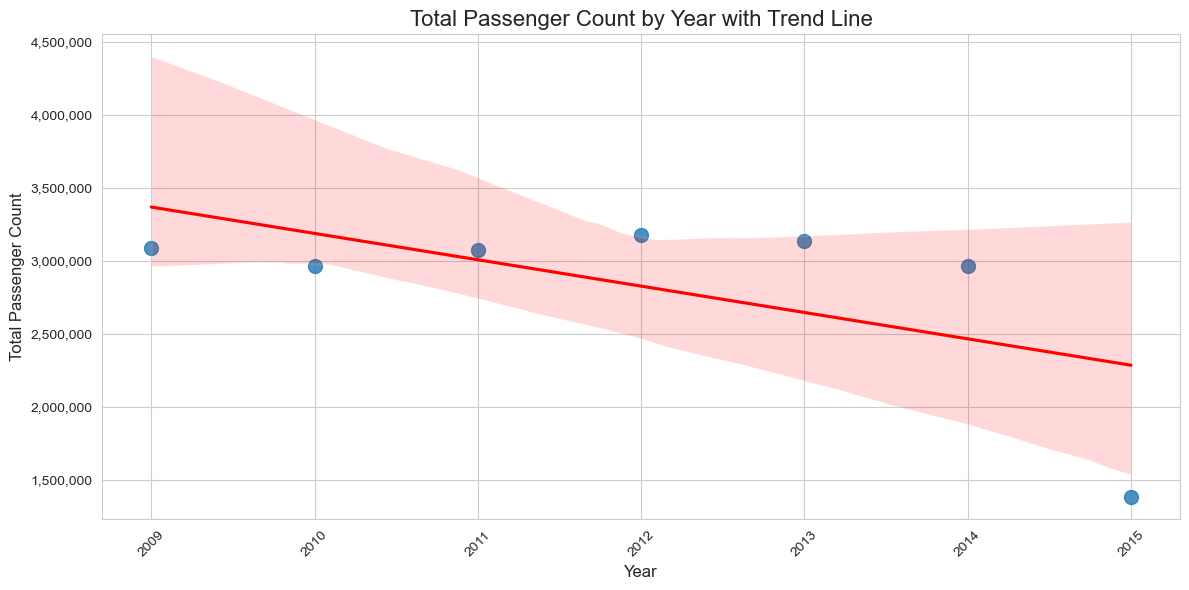

In [166]:
import matplotlib.ticker as ticker
plt.figure(figsize=(12, 6))
sns.regplot(data=annual_passenger_counts, x='year', y='passenger_count', marker='o', scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Total Passenger Count by Year with Trend Line', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)

# Set the y-axis formatter to remove scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [363]:
yearly_passengers = df.groupby(pd.Grouper(key='pickup_datetime', freq='Y'))['passenger_count'].mean().reset_index()

yearly_passengers['time'] = np.arange(len(yearly_passengers))

X = sm.add_constant(yearly_passengers['time'])
y = yearly_passengers['passenger_count']

model = sm.OLS(y, X).fit()

print(model.summary())

C:\Users\Pump\AppData\Local\Temp\ipykernel_30948\3134689600.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_passengers = df.groupby(pd.Grouper(key='pickup_datetime', freq='Y'))['passenger_count'].mean().reset_index()


                            OLS Regression Results                            
Dep. Variable:        passenger_count   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                    0.6036
Date:                Fri, 25 Oct 2024   Prob (F-statistic):              0.472
Time:                        04:13:21   Log-Likelihood:                 18.664
No. Observations:                   7   AIC:                            -33.33
Df Residuals:                       5   BIC:                            -33.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6760      0.014    123.593      0.0

C:\Users\Pump\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
